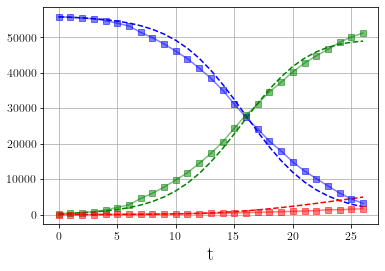

In [43]:
from scipy.integrate import odeint
def pend(x, t, beta, gamma):
    s, i, r = x
    dxdt = [-beta*s*i, 
            beta*s*i - gamma*i , 
            gamma*i]
    return dxdt

y0 = [0.9949285714285714,
      0.0049642857142857145,
      0.00010714285714285714]
t = np.linspace(0, 26, 27)

beta = 0.340121
#beta = 0.34
gamma = 0.00924
#gamma = 0.000924
sol = odeint(pend, y0, t, args=(beta, gamma))
N = 56 * 10 ** 3

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(t, N*sol[:, 0], 'blue', label='S', linestyle = '--')
ax.plot(t, N*sol[:, 1], 'green', label='I', linestyle = '--')
ax.plot(t, N*sol[:, 2], 'red', label='R', linestyle = '--')
ax.plot(days[bool_array].index, N*S, color ='blue', marker = 's', alpha= 0.5,
       label = 'Datos S')
ax.plot(days[bool_array].index, N*I, color ='green',marker = 's',alpha= 0.5,
       label = 'Datos I')
ax.plot(days[bool_array].index, N*R, color ='red',marker = 's',alpha= 0.5,
       label = 'Datos R')
#ax.legend(loc='best')
ax.set_xlabel('t')
ax.grid()

# Caso 1

Dado que $\dot{N} = \dot{S} + \dot{I} + \dot{R} = 0$. Entonces, basta con obtener dos ecuaciones para inferir la tercera. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import PDEparams as pde

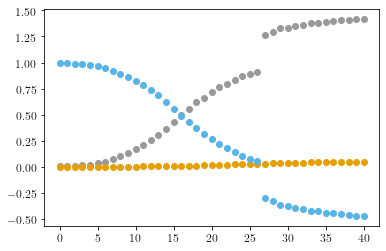

0.9949285714285714 0.0049642857142857145 0.00010714285714285714


In [27]:
df = pd.read_csv('../LotkaVolterraData.csv')

data = pd.read_csv('CoV2019.csv')
china = data["China"][:]  # data["China"][:27]
days = data["Days"][:]
total = data["Total"][:]
deaths_china = data["Death China"][:]
other = data["Other"]
china_total = data["China"]
days_total = data["Days"]
deaths_china_total = data["Death China"]
deaths_outside_total = data["Death Outside"]

# Vamos a suponer que si estás en R si estás muerto.

N = 56 * 10 ** 3  # estimate of people affected by lock down

I = china.copy() / N
R = deaths_china_total.copy() / N
plt.scatter(range(len(I)), I)
plt.scatter(range(len(I)), R)
plt.scatter(range(len(I)), 1-I -R)
plt.show()
bool_array = (I <= 1)
I = I[bool_array]
R = R[bool_array]
S = 1 - I - R

init_I = I[0]
init_R = R[0]
init_S = S[0]
print(init_S, init_I, init_R)

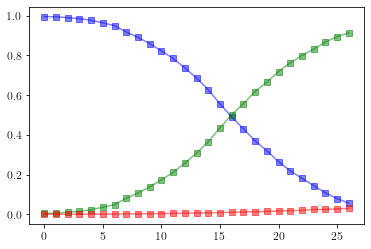

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
           dtype='int64')


In [12]:
fig, ax = plt.subplots()
ax.plot(days[bool_array].index, S, color ='blue', marker = 's', alpha= 0.5,
       label = 'Datos S')
ax.plot(days[bool_array].index, I, color ='green',marker = 's',alpha= 0.5,
       label = 'Datos I')
ax.plot(days[bool_array].index, R, color ='red',marker = 's',alpha= 0.5,
       label = 'Datos R')
plt.show()
print(days[bool_array].index)

In [10]:
# -----------------------------------------------------------
# ------------- Primer ajuste -------------------------------
# -----------------------------------------------------------
def LotkaVolterra(z, t, a, b):
    '''The input z corresponds to the current state of the system, z = [x, y]. Since the input is in 1D, no
    pre-processing is needed.

    t is the current time.

    a and b correspond to the unknown parameters.
    '''

    x, y = z

    return [-b * x * y,
            b * x * y - a*y]


def initial_x():
    return init_S

def initial_y():
    return init_I



new_df = pd.DataFrame({'0': days[bool_array].index,
                       '1': S,
                       '2': I})
#print(new_df)


my_model = pde.PDEmodel(new_df, LotkaVolterra, [initial_x, initial_y], bounds=[(0, 0.04), (0.2,0.5)],
                         param_names=[r'$\gamma$', r'$\beta$'], nvars=2, ndims=0, nreplicates=1)

my_model.fit()
print(my_model.best_params)
print(my_model.best_error)
print(my_model.likelihood_profiles())

   $\gamma$   $\beta$
0   0.00924  0.340121
   $\gamma$   $\beta$
0   0.00924  0.340121
0.0010679596835640578




None


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


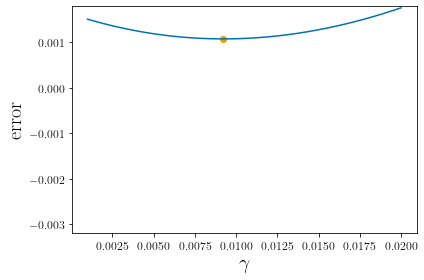

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


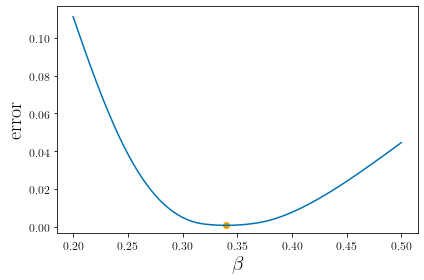

In [7]:
my_model.plot_profiles()
#plt.show()

In [46]:
%%time
my_model.bootstrap()


         $\gamma$     $\beta$
count  100.000000  100.000000
mean     0.009239    0.340119
std      0.000008    0.000018
min      0.009210    0.340054
25%      0.009239    0.340121
50%      0.009240    0.340121
75%      0.009240    0.340121
max      0.009273    0.340198
Wall time: 37.9 s


In [47]:
my_model.bootstrap_summary

,$\gamma$,$\beta$
count,100.000000,100.000000
mean,0.009239,0.340119
std,0.000008,0.000018
min,0.009210,0.340054
25%,0.009239,0.340121
50%,0.009240,0.340121
75%,0.009240,0.340121
max,0.009273,0.340198


In [48]:
my_model.bootstrap_raw

,$\gamma$,$\beta$
0,0.009240,0.340121
1,0.009226,0.340090
2,0.009230,0.340098
3,0.009240,0.340121
4,0.009239,0.340121
...,...,...
95,0.009240,0.340120
96,0.009238,0.340120
97,0.009240,0.340121
98,0.009240,0.340121


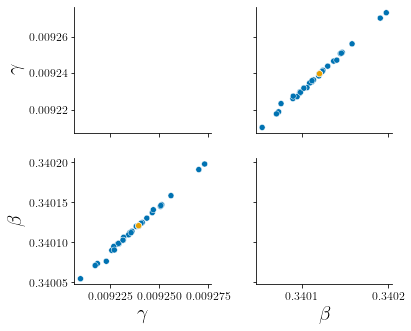

In [49]:
my_model.plot_bootstrap()

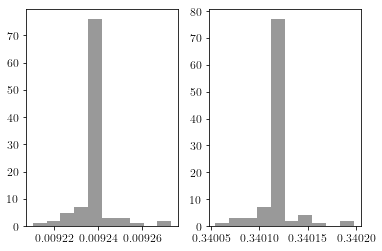

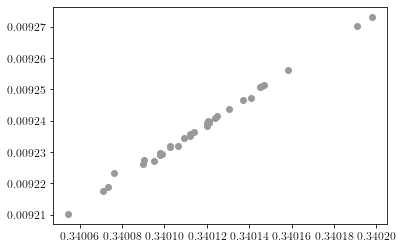

In [60]:
import seaborn as sns
gamma = my_model.bootstrap_raw.iloc[:,0]
beta = my_model.bootstrap_raw.iloc[:,1]

fig, ax = plt.subplots(1,2)
ax[0].hist(gamma)
ax[1].hist(beta)

fig, ax = plt.subplots()
ax.scatter(beta,gamma)